In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# ML model
from xgboost import XGBClassifier

# Save model
import joblib


In [4]:
df = pd.read_csv('Data/invistico_Airline.csv')
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,satisfied
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,satisfied
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,satisfied
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,satisfied
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,satisfied


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [9]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [11]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment 

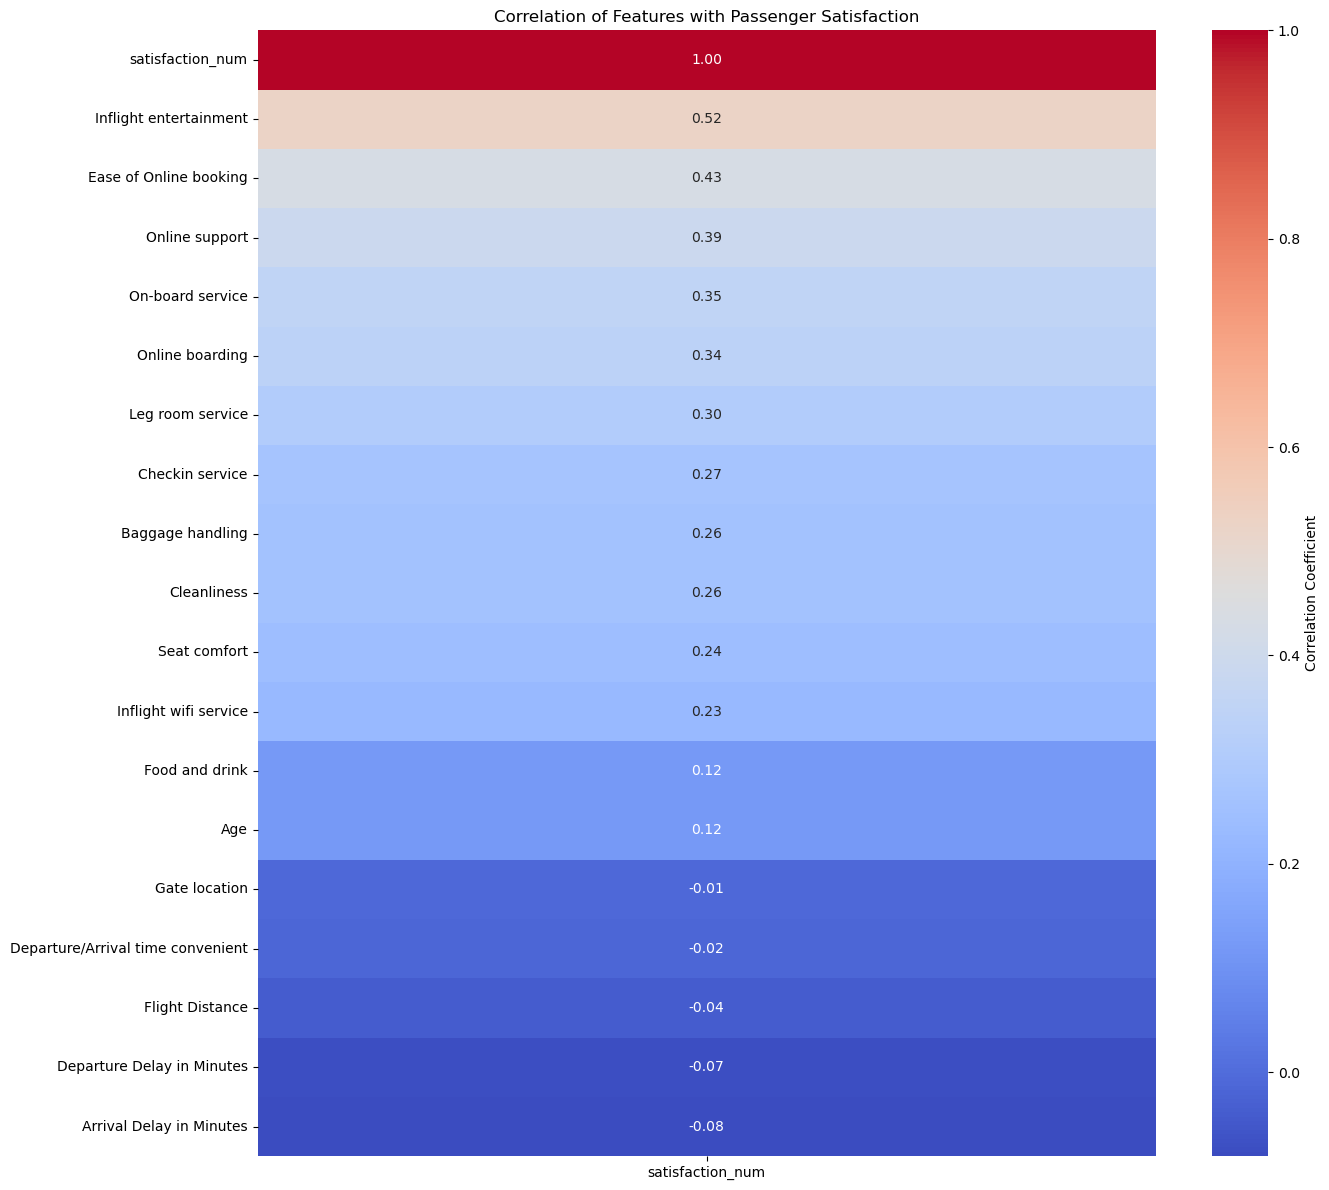

In [13]:

# Copy the original data safely
df_corr = df.copy()

# Clean and encode satisfaction
df_corr['satisfaction'] = df_corr['satisfaction'].str.lower().str.strip()
df_corr['satisfaction_num'] = df_corr['satisfaction'].map({
    'satisfied': 1,
    'dissatisfied': 0  
})


# Print data info and check for potential issues
print("DataFrame info:")
print(df_corr.info())
print("\nSample data from df_corr:")
print(df_corr.head())

# Check for potential encoding issues
print("\nUnique values in 'satisfaction':", df_corr['satisfaction'].unique())
print("Value counts for satisfaction_num:")
print(df_corr['satisfaction_num'].value_counts())
print("NaN values in satisfaction_num:", df_corr['satisfaction_num'].isna().sum())

# Fill missing values for numeric columns
for col in df_corr.select_dtypes(include=['int64', 'float64']).columns:
    if df_corr[col].isna().any():
        print(f"Filling NaN values in {col}")
        df_corr[col] = df_corr[col].fillna(df_corr[col].median())

# Convert rating columns to numeric if they're not already
rating_columns = [
    'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 
    'Gate location', 'Inflight wifi service', 'Inflight entertainment',
    'Online support', 'Ease of Online booking', 'On-board service', 
    'Leg room service', 'Baggage handling', 'Checkin service',
    'Cleanliness', 'Online boarding'
]

for col in rating_columns:
    if df_corr[col].dtype == 'object':
        print(f"Converting {col} to numeric")
        df_corr[col] = pd.to_numeric(df_corr[col], errors='coerce')
        df_corr[col] = df_corr[col].fillna(df_corr[col].median())

# Also ensure Gender and Customer Type are properly encoded if needed
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
for col in cat_cols:
    print(f"Unique values in {col}: {df_corr[col].unique()}")
    
# Create a clean numeric DataFrame
num_df = df_corr.select_dtypes(include=['int64', 'float64']).copy()

# Final check on numeric data
print("\nFinal numeric DataFrame info:")
print(num_df.info())
print("\nChecking for any remaining NaN values:")
print(num_df.isna().sum())

# Check correlation matrix before filtering
print("\nSample of full correlation matrix:")
corr_matrix = num_df.corr()
print(corr_matrix.iloc[:5, :5])

# Plot heatmap of all correlations with satisfaction
plt.figure(figsize=(14, 12))

# Make sure correlation values are calculated and available
if 'satisfaction_num' in corr_matrix.columns:
    correlation_with_satisfaction = corr_matrix[['satisfaction_num']].sort_values(
        by='satisfaction_num', ascending=False
    )
    print("\nCorrelation values with satisfaction:")
    print(correlation_with_satisfaction)
    
    # Create heatmap
    sns.heatmap(
        correlation_with_satisfaction,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        cbar_kws={'label': 'Correlation Coefficient'}
    )
    plt.title('Correlation of Features with Passenger Satisfaction')
    plt.tight_layout()
    plt.show()
else:
    print("\nERROR: 'satisfaction_num' not found in correlation matrix columns!")
    print("Available columns in correlation matrix:", corr_matrix.columns.tolist())

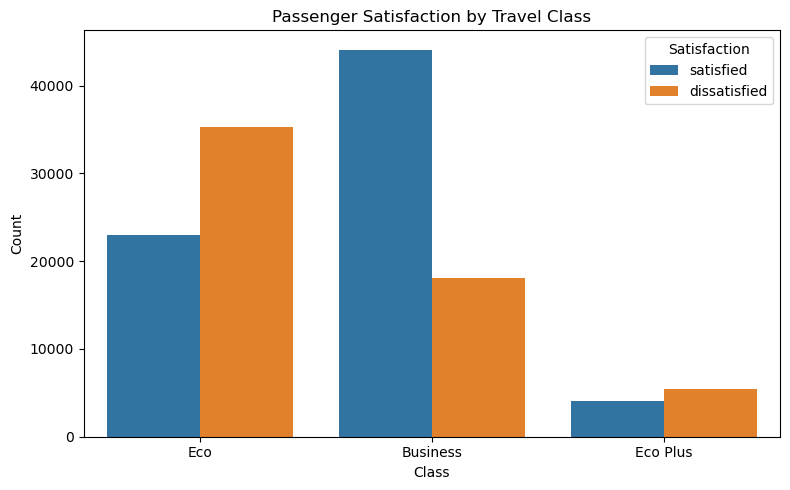

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_corr, x='Class', hue='satisfaction')
plt.title('Passenger Satisfaction by Travel Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()


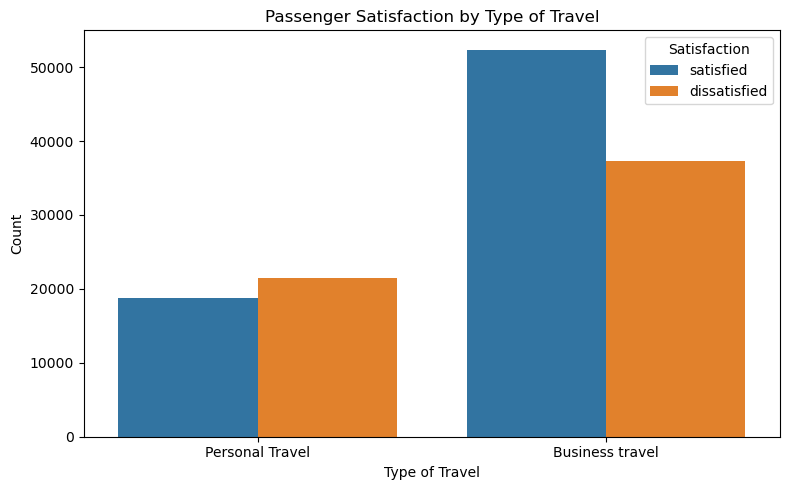

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_corr, x='Type of Travel', hue='satisfaction')
plt.title('Passenger Satisfaction by Type of Travel')
plt.xlabel('Type of Travel')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()


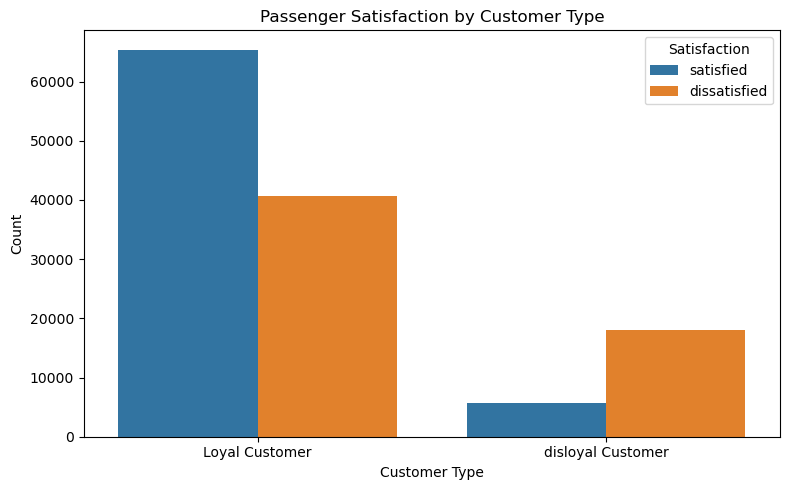

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_corr, x='Customer Type', hue='satisfaction')
plt.title('Passenger Satisfaction by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Satisfaction')
plt.tight_layout()
plt.show()


Encoded shape: (129880, 23)
Training size: (103904, 23)
Testing size: (25976, 23)
Accuracy: 0.9592315983985217

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96     11759
           1       0.97      0.95      0.96     14217

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976


Confusion Matrix:
 [[11340   419]
 [  640 13577]]


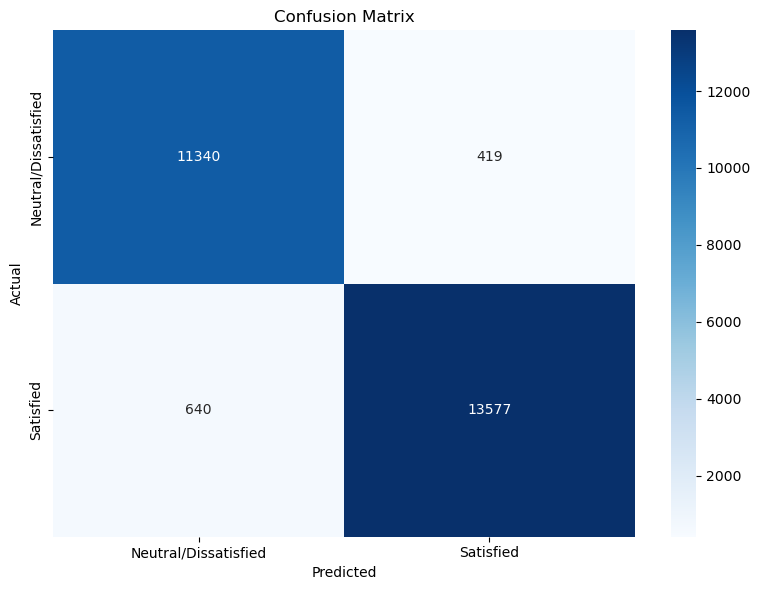

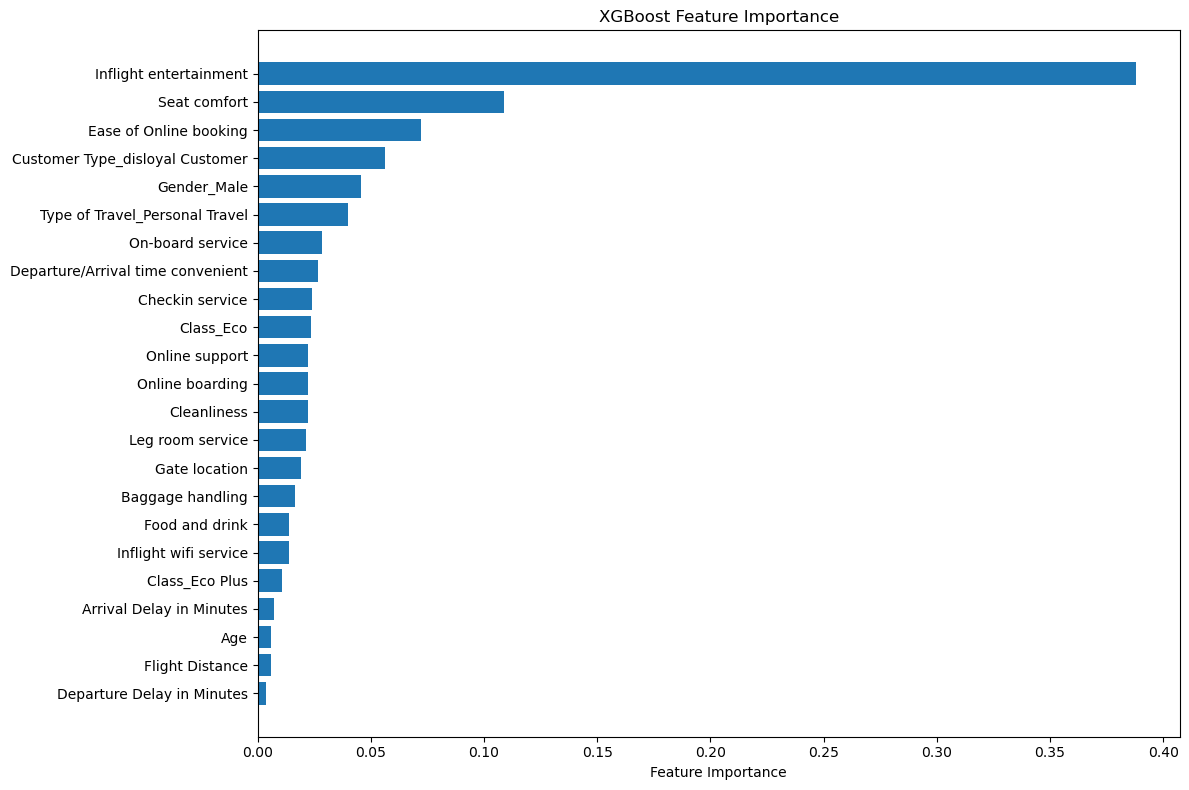

In [19]:


# Assuming df_corr is already created with satisfaction_num
# Drop the original satisfaction (text) and target (satisfaction_num) to form X
X = df_corr.drop(columns=['satisfaction', 'satisfaction_num'])
y = df_corr['satisfaction_num']

# One-hot encode object-type features
X_encoded = pd.get_dummies(X, drop_first=True)
print("Encoded shape:", X_encoded.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)
print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

# Create the model
model = XGBClassifier(random_state=42)  # Removed deprecated parameter

# Train
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Neutral/Dissatisfied', 'Satisfied'],
            yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Feature importance
plt.figure(figsize=(12, 8))
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), X_encoded.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

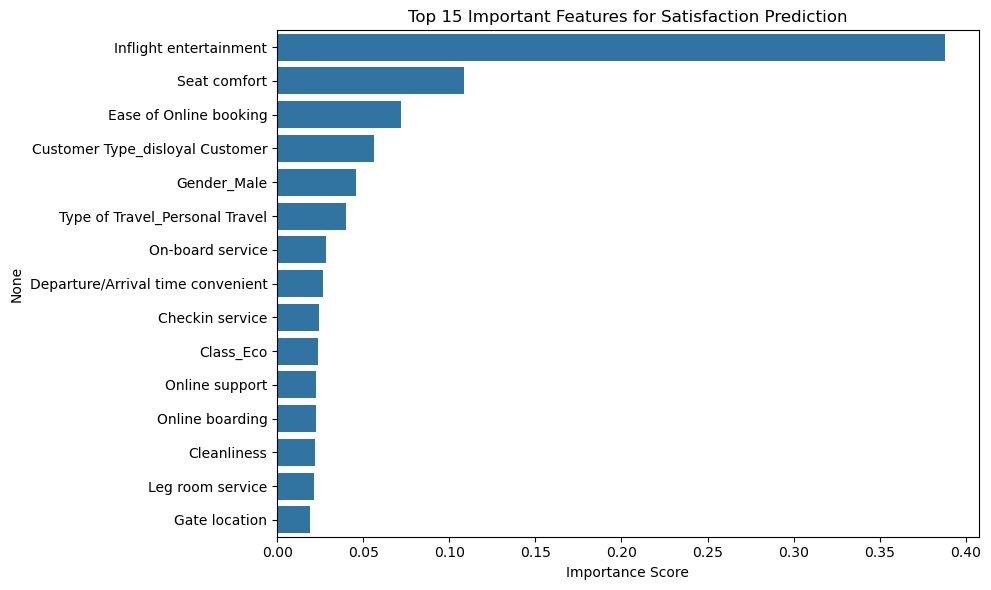

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top features
feature_importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
top_features = feature_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Important Features for Satisfaction Prediction")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [23]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from xgboost import XGBClassifier

# More focused parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],           # Reduced options
    'max_depth': [3, 5, 7],                   # Reduced options
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Fewer points
    'subsample': [0.7, 0.8, 0.9, 1.0],        # Focused on higher values
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0], # Focused on higher values
    'gamma': [0, 0.1, 0.3],                   # Fewer options
    'min_child_weight': [1, 3, 5]             # Fewer options
}

# Create base model with early stopping capability
base_model = XGBClassifier(
    random_state=42,
    early_stopping_rounds=10,  # Stop if no improvement after 10 rounds
    eval_metric='logloss'      # Metric to watch for early stopping
)

# Create RandomizedSearchCV with fewer CV folds
random_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=20,     # Reduced from 50 to 20
    cv=3,          # Reduced from 5 to 3
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,     # Use all cores
    verbose=1
)

# Fit the random search (using validation set to enable early stopping)
X_train_main, X_valid, y_train_main, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

random_search.fit(
    X_train_main, y_train_main,
    eval_set=[(X_valid, y_valid)]  # Add validation set for early stopping
)

# Best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[0]	validation_0-logloss:0.62120
[1]	validation_0-logloss:0.56540
[2]	validation_0-logloss:0.51769
[3]	validation_0-logloss:0.47693
[4]	validation_0-logloss:0.44270
[5]	validation_0-logloss:0.41149
[6]	validation_0-logloss:0.38470
[7]	validation_0-logloss:0.36143
[8]	validation_0-logloss:0.34044
[9]	validation_0-logloss:0.32242
[10]	validation_0-logloss:0.30590
[11]	validation_0-logloss:0.29108
[12]	validation_0-logloss:0.27751
[13]	validation_0-logloss:0.26459
[14]	validation_0-logloss:0.25403
[15]	validation_0-logloss:0.24385
[16]	validation_0-logloss:0.23447
[17]	validation_0-logloss:0.22586
[18]	validation_0-logloss:0.21872
[19]	validation_0-logloss:0.21202
[20]	validation_0-logloss:0.20513
[21]	validation_0-logloss:0.19893
[22]	validation_0-logloss:0.19319
[23]	validation_0-logloss:0.18812
[24]	validation_0-logloss:0.18331
[25]	validation_0-logloss:0.17884
[26]	validation_0-logloss:0.17484
[27]	validation_0-logloss:0.171

In [25]:
# Reconfirm target balance
from collections import Counter

class_counts = Counter(y)
print("Class distribution:", class_counts)

# Compute scale_pos_weight for imbalance handling (for binary classification)
scale_pos_weight = class_counts[0] / class_counts[1]
print("Scale pos weight:", scale_pos_weight)


Class distribution: Counter({1: 71087, 0: 58793})
Scale pos weight: 0.8270569865094883


In [27]:
from xgboost import XGBClassifier

# Use best parameters from RandomizedSearchCV if available
final_model = XGBClassifier(
    **random_search.best_params_,
    scale_pos_weight=scale_pos_weight,  # if imbalance exists
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)

final_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.3,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=-1,
              num_parallel_tree=None, ...)

In [29]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(final_model, X_encoded, y, cv=5, scoring='accuracy')
print("Cross-validated accuracy:", round(cv_scores.mean(), 4), "+/-", round(cv_scores.std(), 4))


Cross-validated accuracy: 0.7573 +/- 0.1085


In [31]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_final = final_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(y_test, y_pred_final))


Test Accuracy: 0.9598475515860795

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     11759
           1       0.97      0.95      0.96     14217

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



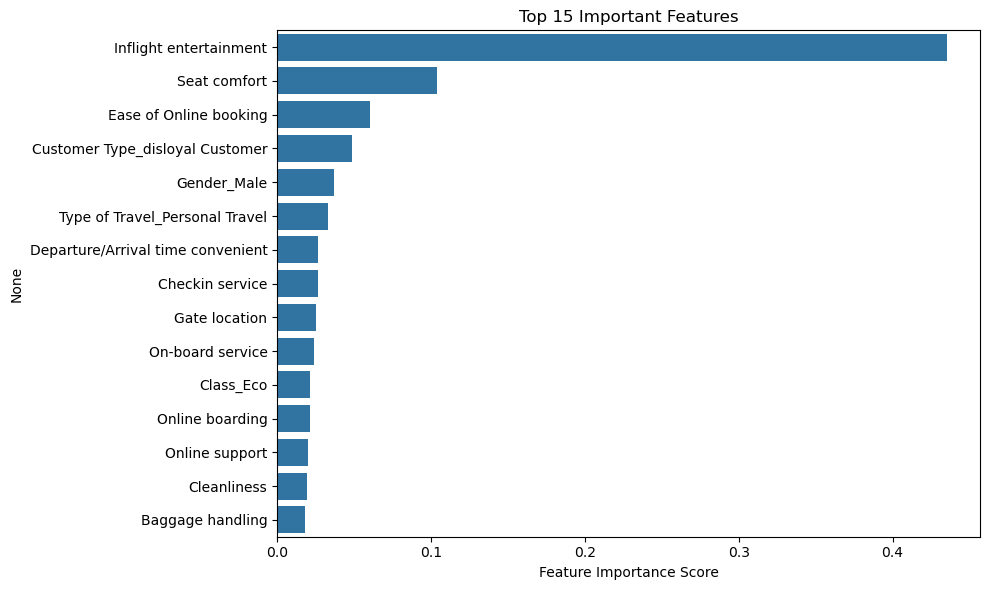

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

feature_importances = pd.Series(final_model.feature_importances_, index=X_encoded.columns)
top_features = feature_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 15 Important Features")
plt.xlabel("Feature Importance Score")
plt.tight_layout()
plt.show()


In [37]:
def predict_satisfaction(input_dict):
    import pandas as pd
    import joblib

    # Load model
    model = joblib.load('xgboost_airline_model_v1.0.joblib')

    # Convert to DataFrame
    input_df = pd.DataFrame([input_dict])

    # Encode same as training
    input_df_encoded = pd.get_dummies(input_df)
    
    # Align with training columns
    input_df_encoded = input_df_encoded.reindex(columns=X_encoded.columns, fill_value=0)

    # Predict
    prediction = model.predict(input_df_encoded)[0]
    return 'satisfied' if prediction == 1 else 'dissatisfied'


Model comparism (Logistic regression, Random Forest, XGBoost)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import time



--------------------------------------------------
Training Logistic Regression...
Training completed in 4.12 seconds
Accuracy: 0.8369
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     11759
           1       0.85      0.85      0.85     14217

    accuracy                           0.84     25976
   macro avg       0.84      0.84      0.84     25976
weighted avg       0.84      0.84      0.84     25976


--------------------------------------------------
Training Random Forest...
Training completed in 9.55 seconds
Accuracy: 0.9590
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11759
           1       0.97      0.96      0.96     14217

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976


---------------------------------

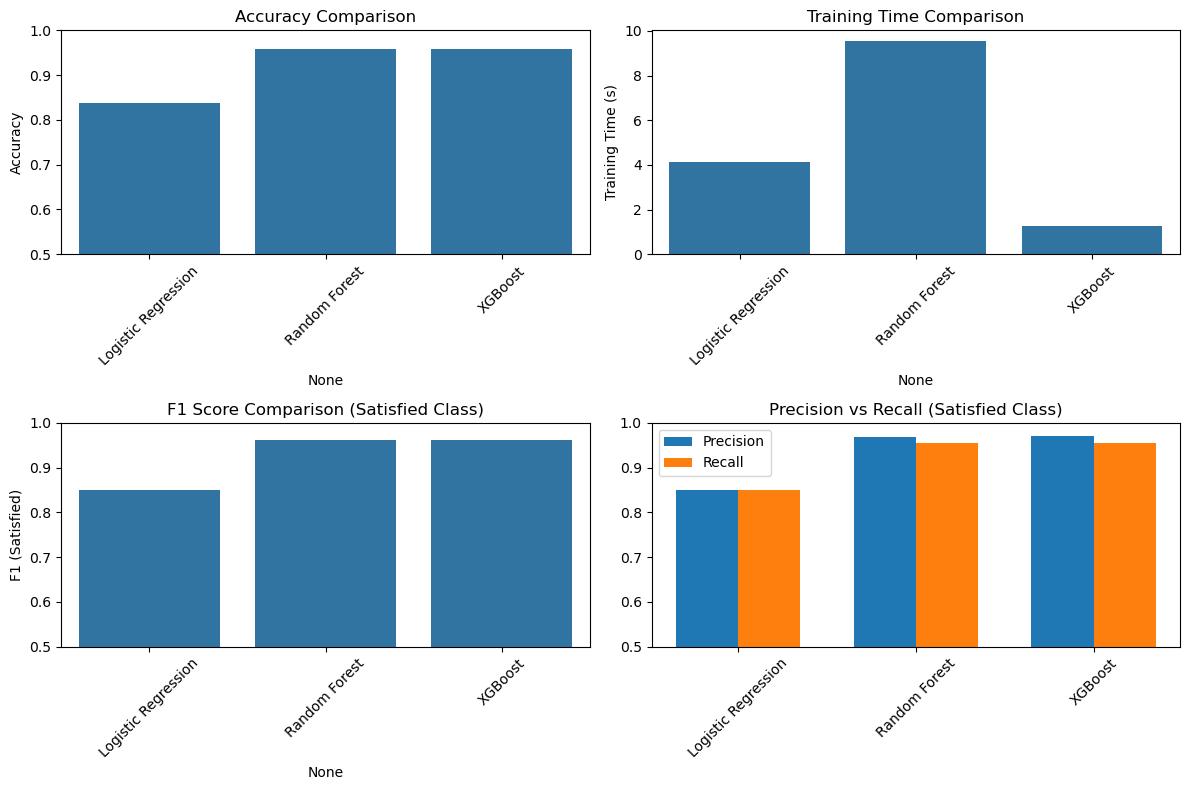

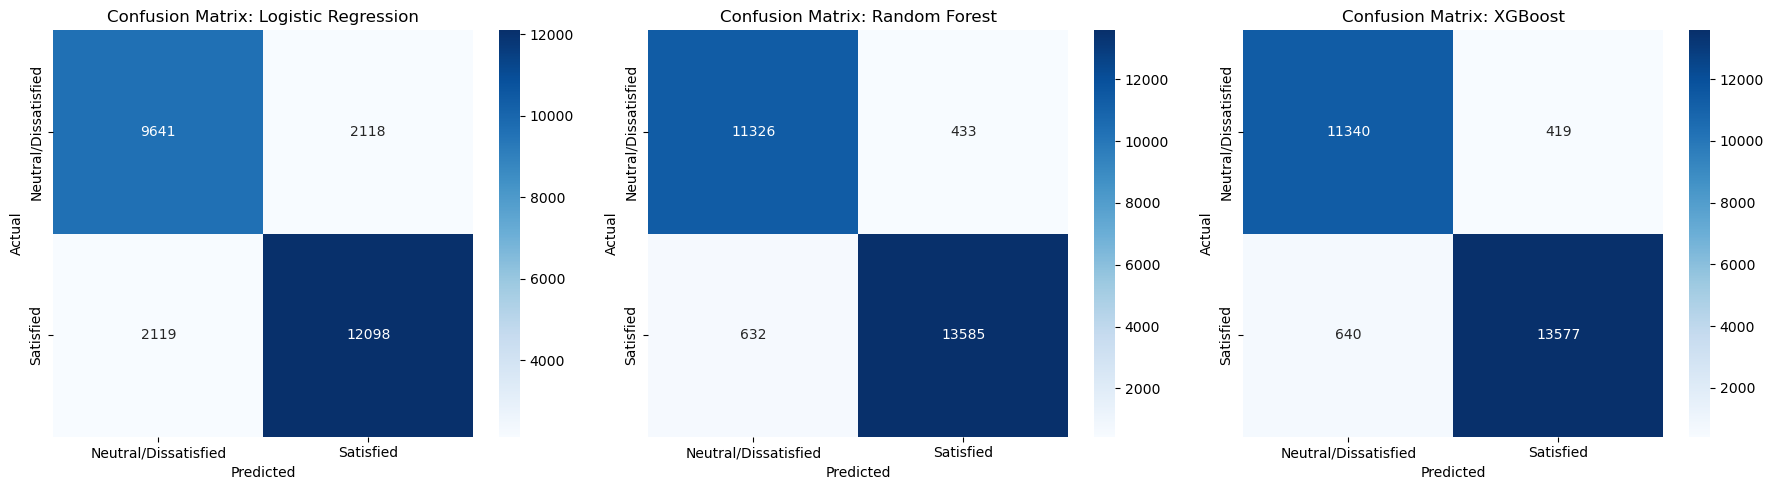

In [41]:
# Assuming X_train, X_test, y_train, y_test are already defined from previous code

# 1. Fix the convergence warning for Logistic Regression by scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Time each model's training and evaluate performance
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, n_jobs=-1),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n{'-'*50}")
    print(f"Training {name}...")
    
    # Start timing
    start_time = time.time()
    
    # Use scaled data for logistic regression, unscaled for tree-based models
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    # End timing
    train_time = time.time() - start_time
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'training_time': train_time,
        'precision_class1': report['1']['precision'],
        'recall_class1': report['1']['recall'],
        'f1_class1': report['1']['f1-score'],
        'confusion_matrix': cm
    }
    
    # Print results
    print(f"Training completed in {train_time:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# 3. Compare models
compare_df = pd.DataFrame({
    'Accuracy': [results[m]['accuracy'] for m in models],
    'Training Time (s)': [results[m]['training_time'] for m in models], 
    'Precision (Satisfied)': [results[m]['precision_class1'] for m in models],
    'Recall (Satisfied)': [results[m]['recall_class1'] for m in models],
    'F1 (Satisfied)': [results[m]['f1_class1'] for m in models]
}, index=models.keys())

print("\nModel Comparison:")
print(compare_df)

# 4. Plot model comparison
plt.figure(figsize=(12, 8))

# Accuracy comparison
plt.subplot(2, 2, 1)
sns.barplot(x=compare_df.index, y=compare_df['Accuracy'])
plt.title('Accuracy Comparison')
plt.ylim(0.5, 1.0)  # Setting a reasonable y-limit
plt.xticks(rotation=45)

# Training time comparison
plt.subplot(2, 2, 2)
sns.barplot(x=compare_df.index, y=compare_df['Training Time (s)'])
plt.title('Training Time Comparison')
plt.xticks(rotation=45)

# F1 Score comparison
plt.subplot(2, 2, 3)
sns.barplot(x=compare_df.index, y=compare_df['F1 (Satisfied)'])
plt.title('F1 Score Comparison (Satisfied Class)')
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)

# Precision-Recall balance
plt.subplot(2, 2, 4)
width = 0.35
x = np.arange(len(models))
plt.bar(x - width/2, compare_df['Precision (Satisfied)'], width, label='Precision')
plt.bar(x + width/2, compare_df['Recall (Satisfied)'], width, label='Recall')
plt.xticks(x, compare_df.index, rotation=45)
plt.title('Precision vs Recall (Satisfied Class)')
plt.ylim(0.5, 1.0)
plt.legend()

plt.tight_layout()
plt.show()

# 5. Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = list(models.keys())

for i, (name, results_dict) in enumerate(results.items()):
    sns.heatmap(
        results_dict['confusion_matrix'], 
        annot=True, 
        fmt='d', 
        cmap='Blues',
        xticklabels=['Neutral/Dissatisfied', 'Satisfied'],
        yticklabels=['Neutral/Dissatisfied', 'Satisfied'],
        ax=axes[i]
    )
    axes[i].set_title(f'Confusion Matrix: {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [43]:
import joblib

joblib.dump(final_model, 'xgboost_airline_model_v1.0.joblib')
print("Model saved successfully.")


Model saved successfully.


In [45]:
import joblib
joblib.dump(X_encoded.columns.tolist(), 'model_columns.joblib')
print("Model saved successfully.")


Model saved successfully.
